# Засоби підготовки та налізу даних
## Лабораторна робота №2
### ФБ-22 Лаптєв Денис
#### Підготовка середовища

In [2]:
from os import listdir
from datetime import datetime
import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print ('setup complete')

C:\Users\Denys\AppData\Local\Temp\ipykernel_17504\269313534.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


setup complete


#### Завантаження датасетів

In [3]:
def dwn (i, y1, y2):
    url='https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php?country=UKR&provinceID='+str(i)+'&year1='+str(y1)+'&year2='+str(y2)+'&type=Mean'

    wp = urllib.request.urlopen(url)
    text = wp.read()

    now = datetime.now()
    date_and_time_time = now.strftime('%d-%m-%Y_%H-%M-%S')
    out = open('data/NOAA_ID'+str(i)+'_'+date_and_time_time+'.csv','wb') # 'data/' — dir name
    out.write(text)
    out.close()




for i in range(1,28): # y 29
    dwn(i, 2000, 2020)

#### Зчитування файлів та об'єднання в один датафрейм

Тут я не дуже зрозумів навіщо змінювати ідентифікатори адміністративних центрів\областей. Та й тим більше, що їх кількість різна.

In [6]:
def csvs_to_frame(dir):
    file_names = listdir(dir)

    headers = ['Year', 'Week', 'SMN', 'SMT', 'VCI', 'TCI', 'VHI', 'AreaID']
    dfs = []

    for name in file_names:
        df = pd.read_csv(dir+name, header = 1, names = headers)
        df['AreaID'] = int(name[7:-24])

        # data cleaning
        df = df.drop(df.loc[df['VHI'] == -1].index)
        df = df.drop(df.index[-1])
        df.at[0, 'Year'] =  df.at[0, 'Year'][9:]
        df['Year'] = df['Year'].astype(int)

        dfs.append(df)

    frame = pd.concat(dfs).drop_duplicates().reset_index(drop=True)
    return frame


df = csvs_to_frame('data/')

#### Виведення

##### 1
Ряд VHI для області за вказаний рік, пошук екстремумів (min та max);

max: 11.25 
min: 63.27
       Year  Week    VHI
16080  2000   1.0  24.22
16081  2000   2.0  27.70
16082  2000   3.0  30.68
16083  2000   4.0  32.55
16084  2000   5.0  34.73
16085  2000   6.0  35.08
16086  2000   7.0  33.79
16087  2000   8.0  34.60
16088  2000   9.0  37.70
16089  2000  10.0  38.67
16090  2000  11.0  38.05
16091  2000  12.0  39.32
16092  2000  13.0  40.21
16093  2000  14.0  41.25
16094  2000  15.0  43.66
16095  2000  16.0  47.61
16096  2000  17.0  52.54
16097  2000  18.0  60.14
16098  2000  19.0  62.91
16099  2000  20.0  63.27
16100  2000  21.0  61.76
16101  2000  22.0  58.32
16102  2000  23.0  56.10
16103  2000  24.0  55.32
16104  2000  25.0  55.03
16105  2000  26.0  54.68
16106  2000  27.0  55.27
16107  2000  28.0  56.28
16108  2000  29.0  57.93
16109  2000  30.0  57.94
16110  2000  31.0  57.29
16111  2000  32.0  56.45
16112  2000  33.0  54.95
16113  2000  34.0  55.00
16114  2000  35.0  55.77
16115  2000  36.0  54.21
16116  2000  37.0  54.28
16117  2000  38.0  52.57
16

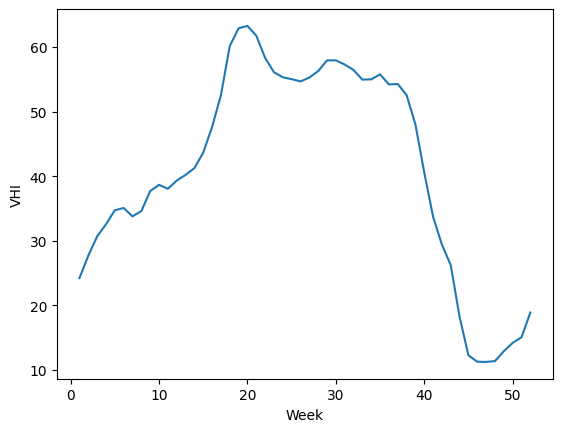

In [13]:

def fun_1 (AreaID, year):
    result_df = df[(df['Year'] == year) & (df['AreaID'] == AreaID)][['Year', 'Week', 'VHI']]
    print ('max:', result_df['VHI'].min(), '\nmin:', result_df['VHI'].max())
    #sns.lineplot(x=result_df['Week'], y=result_df['VHI'])
    print (result_df)


fun_1(24, 2000)

##### 2
Ряд VHI за вказаний діапазон років для вказаних областей; виявити роки, протягом яких екстремальні посухи торкнулися більше вказаного відсотка областей по Україні (20% областей - 5 областей з 25);

---

Я спростив задачу прибравши обрахунок відсотку, оскільки це доволі просто додати та не впливає на сам алгоритм. Нам все одно потрібно отримати кількість областей. Тобто замість цього у виклику функції передається кількість і відповідно виводяться роки у яких було більше вказаної кількості регіонів з посухою.

In [59]:
def fun_21(y1, y2, areas):
    temp_df = df[(df['Year'] >= y1) & (df['Year'] <= y2) & (df['AreaID'].isin(areas))]
    #plt.figure(figsize=(14,6)); sns.lineplot(x=temp_df['Year'], y=temp_df['VHI'], hue=temp_df['AreaID'])

fun_21(2000, 2020, [5, 20])

In [68]:
def fun_22(amount):
    df_drought = df[df['VHI'] <= 15][['VHI', 'Year', 'Week', 'AreaID']] # обираютсья з посухою
    df_drought = df_drought.drop_duplicates(subset=['Year', 'AreaID']) # мають однакову комбінацію року та території
    # достатньо лиш одного тижня з посухою аби зарахувати рік
    #print (df_drought)
    counts = df_drought['Year'].value_counts() # кількістів рядків за роком
    result_year = counts[counts > amount] # більше за зазначене
    print(result_year)

fun_22(4)

Year
2000    6
2007    5
Name: count, dtype: int64



##### 3
Аналогічно для помірних посух

In [69]:
def fun_3(amount):
    df_drought = df[df['VHI'] <= 35][['VHI', 'Year', 'Week', 'AreaID']]
    df_drought = df_drought.drop_duplicates(subset=['Year', 'AreaID'])
    #print (df_drought)
    counts = df_drought['Year'].value_counts()
    result_year = counts[counts > amount]
    print(result_year)


fun_3(20)

Year
2000    27
2019    27
2015    24
Name: count, dtype: int64
